# EDA-1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


Q1. What is the range of selling prices in the dataset?

In [ ]:
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()

range = max_price - min_price

print("Range of Selling Prices:", range)

Range of Selling Prices: 755000


Q2. What is the median selling price for bikes in the dataset?

In [ ]:
median_selling_price = df['selling_price'].median()
median_selling_price

45000.0

Q3. What is the most common seller type?

In [ ]:
mode_selling_price = df['selling_price'].mode()
mode_selling_price

,selling_price
0,25000


 Q4. How many bikes have driven more than 50,000 kilometers?

In [ ]:
count = (df['km_driven'] > 50000).sum()
count

170

Q5. What is the average km_driven value for each ownership type?



In [ ]:
average_km_driven = df.groupby('owner')['km_driven'].mean()
average_km_driven

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


Q6. What proportion of bikes are from the year 2015 or older?

In [ ]:
older_bikes = df[df['year'] <= 2015]
proportion = len(older_bikes) / len(df)
proportion

0.5664467483506126

Q7. What is the trend of missing values across the dataset?

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
#Only ex_showroon_price has missing values

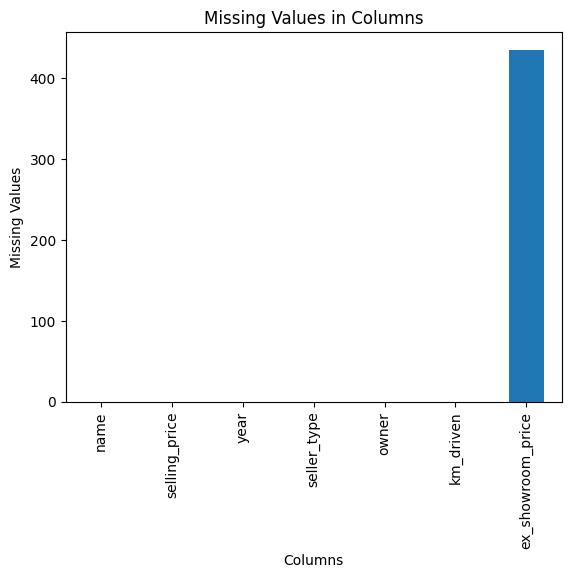

In [ ]:
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.title('Missing Values in Columns')
plt.show()

Q8. What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
sorted_df = df.sort_values(by='selling_price', ascending=False)
highest_price = sorted_df.iloc[0]
highest_price

,295
name,Suzuki GSX S750
selling_price,760000
year,2019
seller_type,Individual
owner,1st owner
km_driven,2800
ex_showroom_price,752020.0


Q9. What is the total number of bikes listed by each seller type?

In [ ]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


Q10. What is the relationship between selling_price and km_driven for first-owner bikes?

In [ ]:
first_owner_bikes = df[df['owner'] == '1st owner']

In [ ]:
first_owner_bikes

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,first_owner_bikes
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,False
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,False
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,False
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,False
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0,False
...,...,...,...,...,...,...,...,...
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0,False
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,False
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,False
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,False


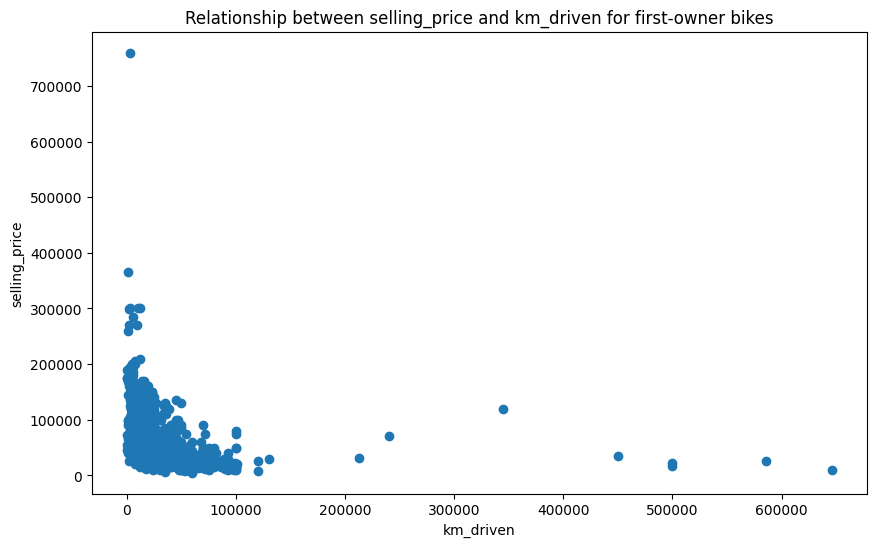

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(first_owner_bikes['km_driven'], first_owner_bikes['selling_price'])
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.title('Relationship between selling_price and km_driven for first-owner bikes')
plt.show()

In [ ]:
#insights
#1.Negative Correlation: There appears to be a general trend where the selling price decreases as the kilometers driven increases.
# Bikes with higher kilometers tend to have lower selling prices.

#2.Clustered Data: Most data points are concentrated in the region where kilometers driven is under 100,000, and selling prices are below 100,000. This indicates that the majority of first-owner bikes in the dataset have lower usage and corresponding lower prices.
#3. Outliers: There are a few notable outliers:
#A few bikes with very high selling prices (over 300,000 or even 700,000), despite their kilometers driven being relatively low.
#A few bikes with exceptionally high kilometers driven (over 300,000), but their selling prices are significantly lower.


Q11. Identify and remove outliers in the km_driven column using the IQR method.

In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]

df = df.drop(outliers.index)
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price

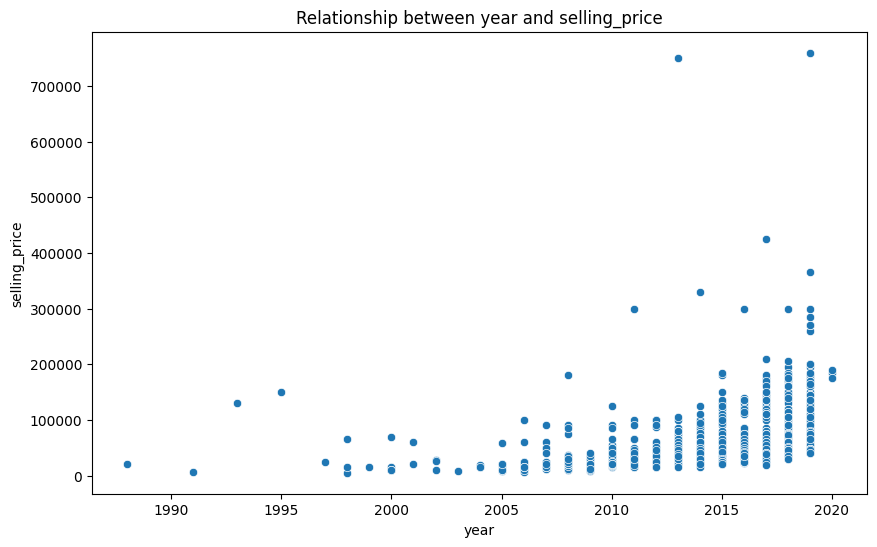

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'year', y = 'selling_price', data = df)
plt.xlabel('year')
plt.ylabel('selling_price')
plt.title('Relationship between year and selling_price')
plt.show()

Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [ ]:
# Calculate the bike's age (current year - manufacturing year)
current_year = 2024
df['age'] = current_year - df['year']

# Calculate the average selling price for each bike age
avg_price_by_age = df.groupby('age')['selling_price'].mean().reset_index()

# Calculate depreciation (change in selling price with age)
avg_price_by_age['depreciation'] = avg_price_by_age['selling_price'].diff().fillna(0)

# Calculate the average depreciation across all ages
average_depreciation = avg_price_by_age['depreciation'].mean()

# Output the average depreciation
print(f"The average depreciation in selling price based on bike age is: {average_depreciation:.2f} INR per year.")


The average depreciation in selling price based on bike age is: -5833.33 INR per year.


Q14. Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
avg_price_by_age = df.groupby('year')['selling_price'].mean()

In [ ]:
df['avg_price'] = df['year'].map(avg_price_by_age)

In [ ]:
threshold = 1.5
significantly_above_avg = df[df['selling_price'] > df['avg_price'] * threshold]
print(significantly_above_avg[['name', 'selling_price', 'avg_price']])

                                     name  selling_price      avg_price
2     Royal Enfield Classic Gunmetal Grey         150000   87660.374046
7    Royal Enfield Bullet 350 [2007-2011]         180000   37004.166667
13                          Yamaha YZF R3         365000  119689.511628
18    Royal Enfield Classic Gunmetal Grey         150000   87660.374046
23                          Jawa Standard         180000  119689.511628
..                                    ...            ...            ...
979             Royal Enfield Thunder 500         105000   56313.131313
981             Royal Enfield Thunder 350         105000   51802.816901
983             Royal Enfield Classic 350         100000   56313.131313
984             Royal Enfield Classic 500          95000   49121.348315
985             Royal Enfield Classic 500          90000   35859.631579

[155 rows x 3 columns]


Q14. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns

,selling_price,year,km_driven,ex_showroom_price,age,avg_price
0,175000,2019,350,NaN,5,119689.511628
1,45000,2017,5650,NaN,7,78962.121212
2,150000,2018,12000,148114.0,6,87660.374046
3,65000,2015,23000,89643.0,9,56313.131313
4,20000,2011,21000,NaN,13,35859.631579
...,...,...,...,...,...,...
1054,20000,2010,50000,78700.0,14,32350.877193
1055,18000,2017,35000,32000.0,7,78962.121212
1057,16000,2012,33000,51000.0,12,36720.619048
1058,15000,2013,35000,57000.0,11,51802.816901


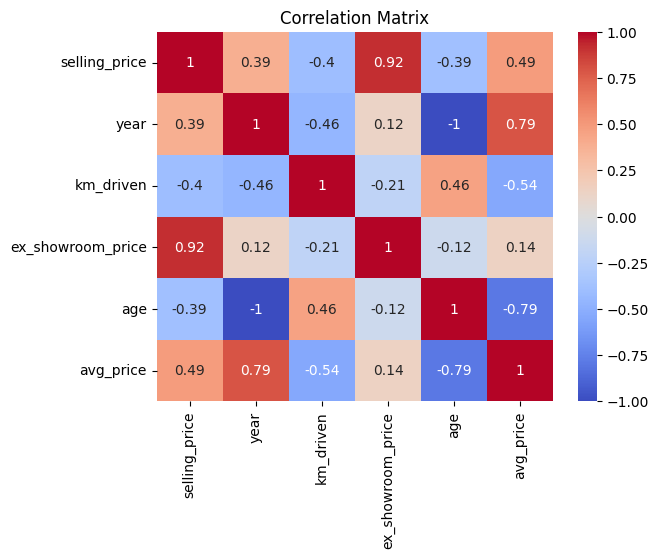

In [ ]:
corr_matrix = df[numeric_columns.columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# EDA-2

In [ ]:
df1 = pd.read_csv('Car Sale.csv')
df1

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [ ]:
df1.groupby('Dealer_Name')['Price ($)'].mean()

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [ ]:
price_variation_by_brand = df1.groupby('Company')['Price ($)'].std()
price_variation_by_brand_sorted = price_variation_by_brand.sort_values(ascending=False)
price_variation_by_brand_sorted.head(1)

,Price ($)
Company,
Lincoln,19658.050211


Q3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

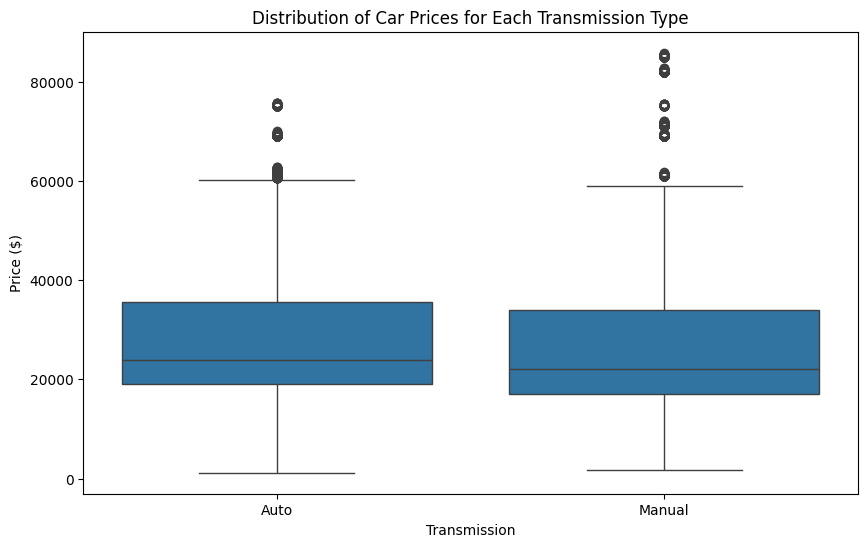

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Transmission', y = 'Price ($)', data = df1)
plt.xlabel('Transmission')
plt.ylabel('Price ($)')
plt.title('Distribution of Car Prices for Each Transmission Type')
plt.show()

In [ ]:
IQR_by_transmission = df1.groupby('Transmission')['Price ($)'].quantile(0.75) - df1.groupby('Transmission')['Price ($)'].quantile(0.25)
IQR_by_transmission

,Price ($)
Transmission,
Auto,16500.0
Manual,17000.0


Q4. What is the distribution of car prices across different regions?

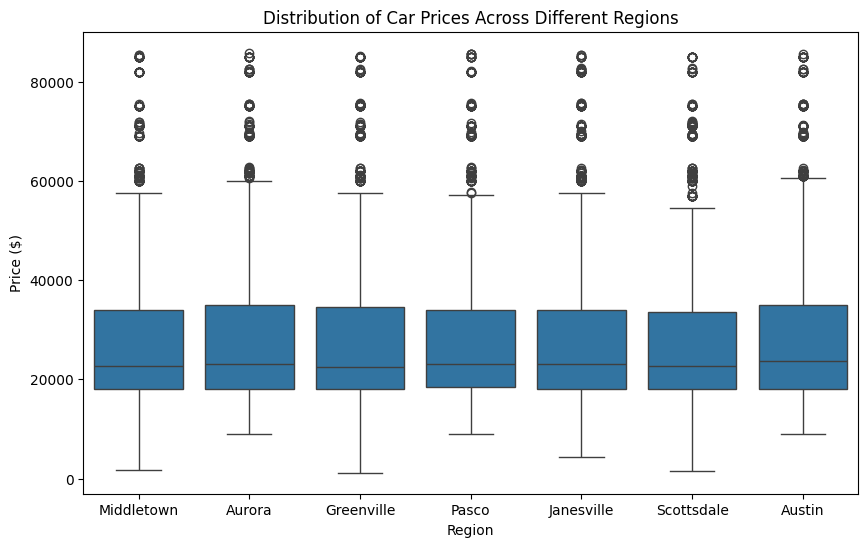

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Dealer_Region', y = 'Price ($)', data = df1)
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.title('Distribution of Car Prices Across Different Regions')
plt.show()

Q5. What is the distribution of cars based on body styles?

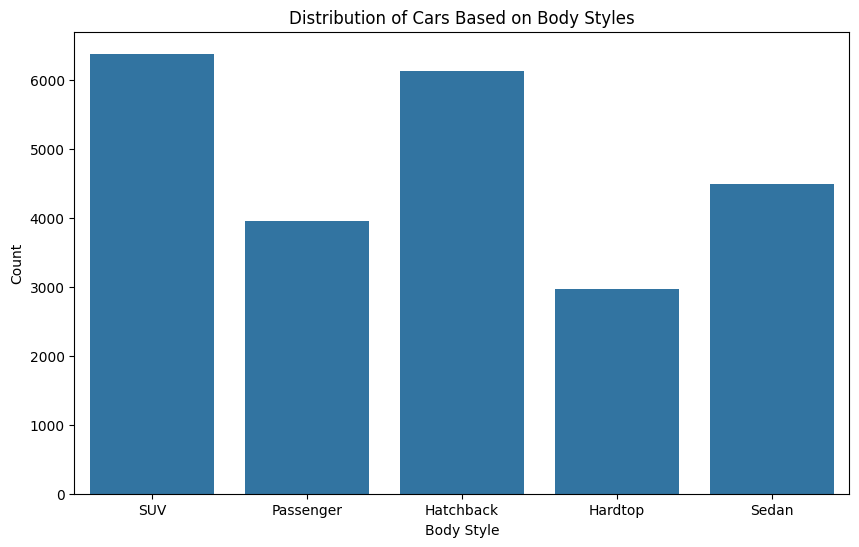

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Body Style', data = df1)
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.title('Distribution of Cars Based on Body Styles')
plt.show()

Q6. How does the average selling price of cars vary by customer gender and
annual income?

In [84]:
avg_price_by_gender_income = df1.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
avg_price_by_gender_income

,Gender,Annual Income,Price ($)
0,Female,13500,28132.038732
1,Female,106000,46001.000000
2,Female,121000,20000.000000
3,Female,190000,19001.000000
4,Female,211000,51000.000000
...,...,...,...
3437,Male,6600000,39000.000000
3438,Male,6800000,15000.000000
3439,Male,7650000,21000.000000
3440,Male,8000000,85000.000000


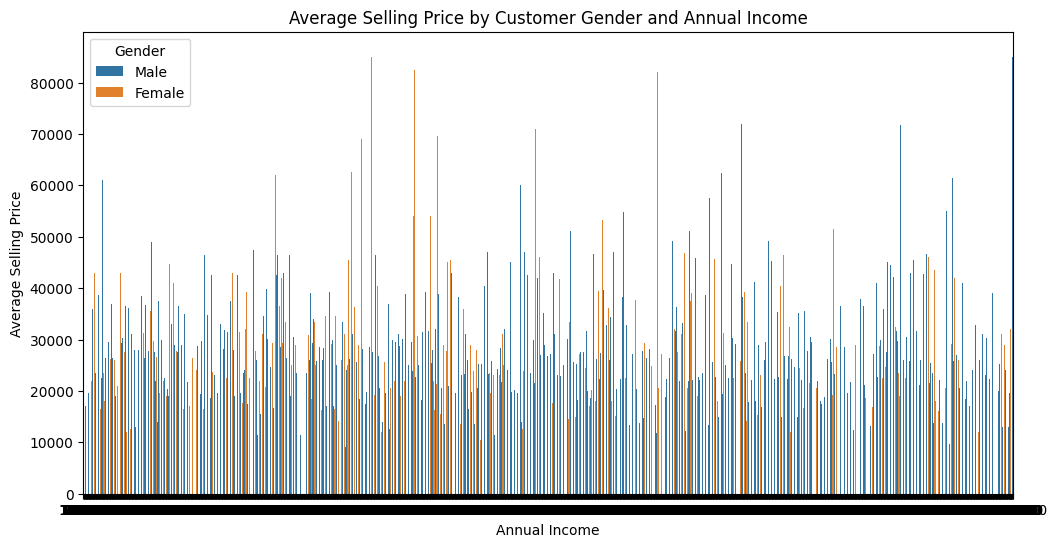

In [85]:
plt.figure(figsize = (12,6))
sns.barplot(x='Annual Income', y='Price ($)', hue='Gender', data=avg_price_by_gender_income)
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Customer Gender and Annual Income')
plt.show()

The data seems noisy, with no obvious pattern linking annual income, gender, and selling price.

This suggests that while income may partially influence the selling price, other variables (like car model, age, and condition) play a significant role.

Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

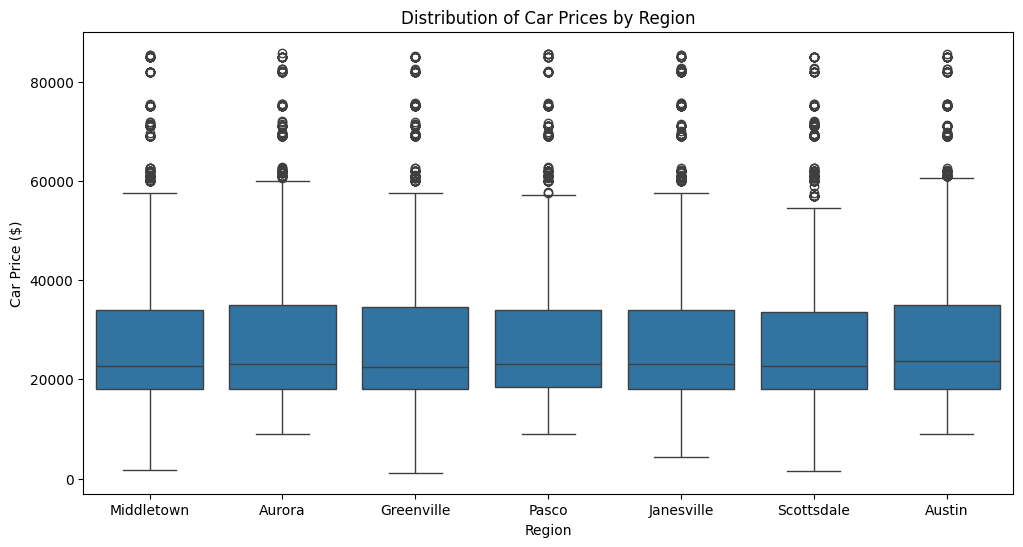

In [90]:
# Boxplot for distribution of car prices by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df1)
plt.xlabel('Region')
plt.ylabel('Car Price ($)')
plt.title('Distribution of Car Prices by Region')
plt.show()

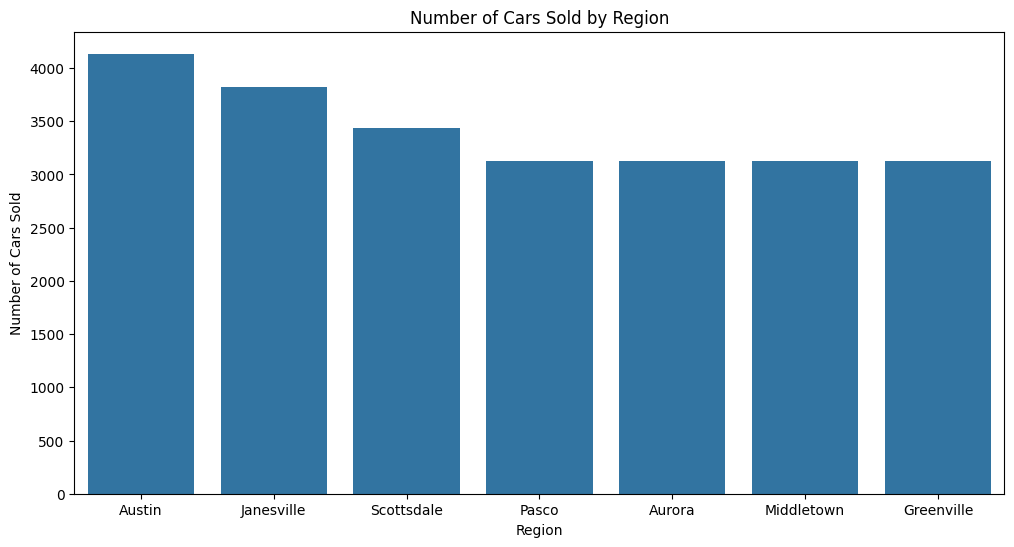

In [91]:
# Barplot for number of cars sold by region
plt.figure(figsize=(12, 6))
region_counts = df1['Dealer_Region'].value_counts()  # Count number of cars sold by region
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Cars Sold by Region')
plt.show()

In [92]:
# Austin has the highest numner of sold cars
# Pasco Region, Aurora, Middletown and Greenville sold same number of cars

Q8. How does the average car price differ between cars with different engine sizes?

In [94]:
avg_price_by_engine = df1.groupby('Engine')['Price ($)'].mean().reset_index()
avg_price_by_engine

,Engine,Price ($)
0,DoubleÂ Overhead Camshaft,28248.525972
1,Overhead Camshaft,27914.710631


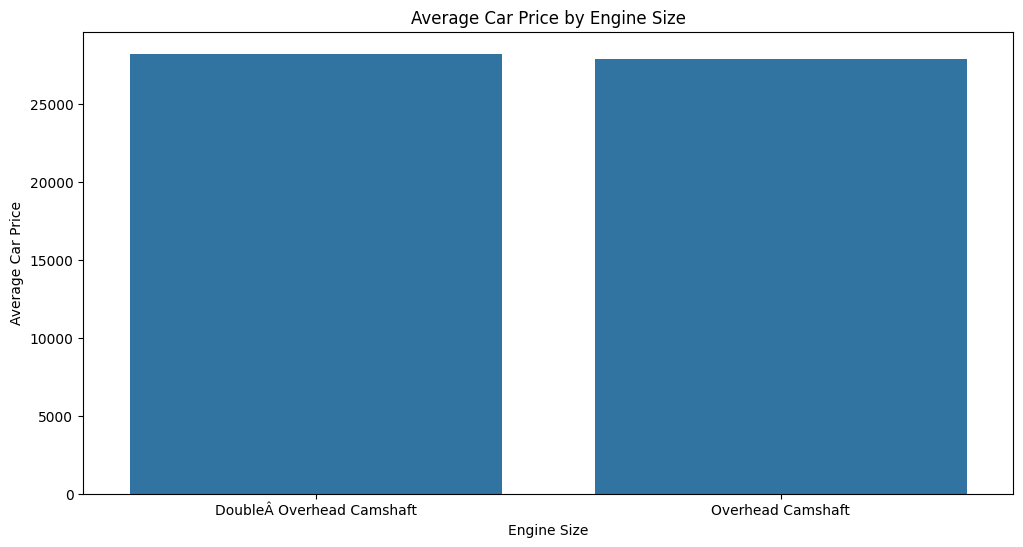

In [99]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Engine', y='Price ($)', data=avg_price_by_engine)
plt.xlabel('Engine Size')
plt.ylabel('Average Car Price')
plt.title('Average Car Price by Engine Size')
plt.show()

In [100]:
#there is a little variation in the average car price of the two engines

Q9. How do car prices vary based on the customer’s annual income bracket?

In [101]:
df1['Income_Category'] = df1['Income Bracket'] = pd.qcut(df1['Annual Income'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

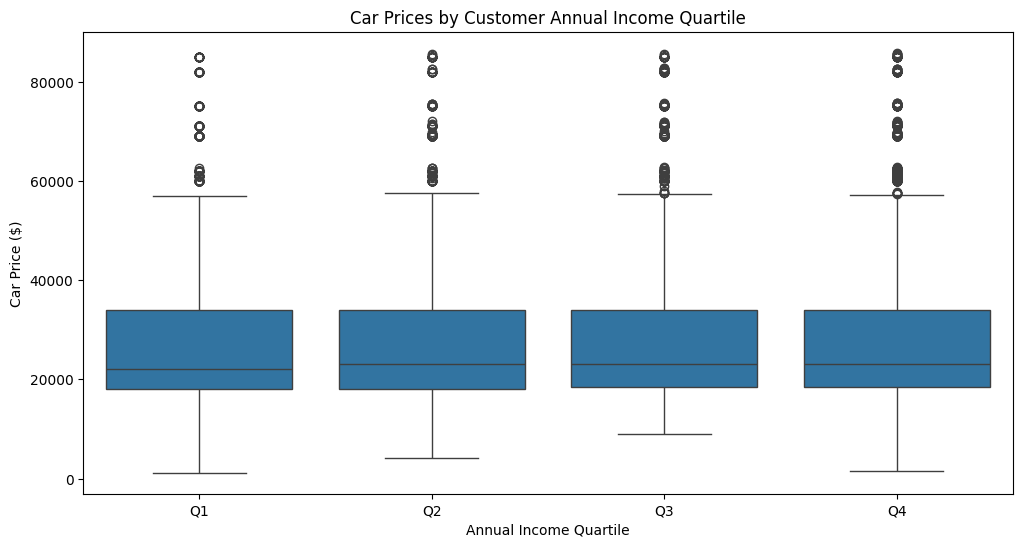

In [102]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Income Bracket', y='Price ($)', data=df1)
plt.xlabel('Annual Income Quartile')
plt.ylabel('Car Price ($)')
plt.title('Car Prices by Customer Annual Income Quartile')
plt.show()

Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [106]:
car_sales_count = df1['Model'].value_counts()
top_5_models = car_sales_count.head(5)
top_5_models

,count
Model,
Diamante,418
Silhouette,411
Prizm,411
Passat,391
Ram Pickup,383


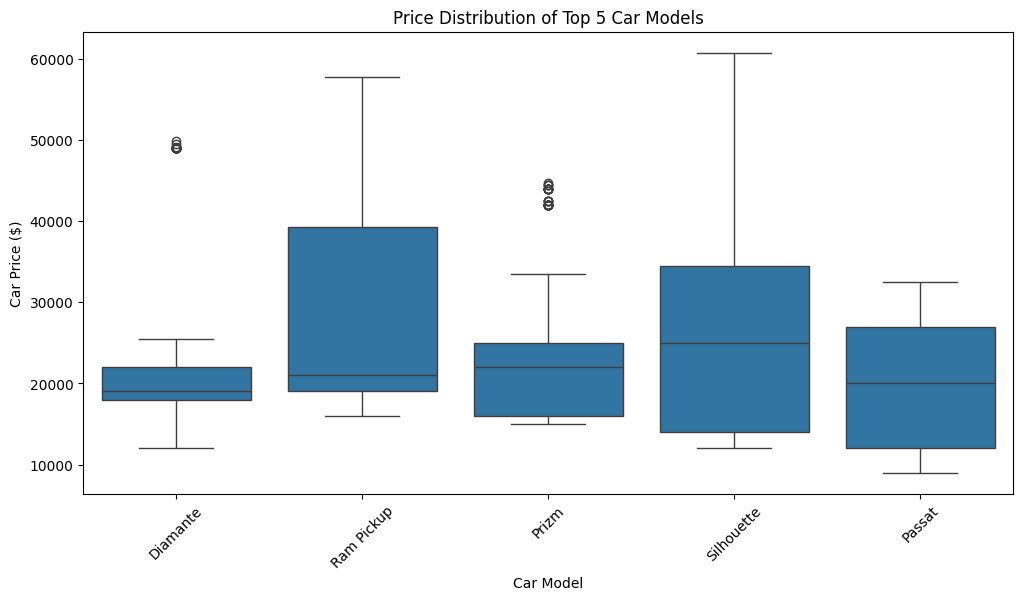

In [107]:
top_5_sales_df = df1[df1['Model'].isin(top_5_models.index)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=df1[df1['Model'].isin(top_5_models.index)])
plt.xlabel('Car Model')
plt.ylabel('Car Price ($)')
plt.title('Price Distribution of Top 5 Car Models')
plt.xticks(rotation=45)
plt.show()

Q11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

In [111]:
price_variation_by_color = df1.groupby('Color')['Price ($)'].std()
highest_variation_color = price_variation_by_color.sort_values(ascending=False)
highest_variation_color

,Price ($)
Color,
Red,15519.360962
Black,15286.065976
Pale White,14077.346859


Q12. Is there any seasonal trend in car sales based on the date of sale?

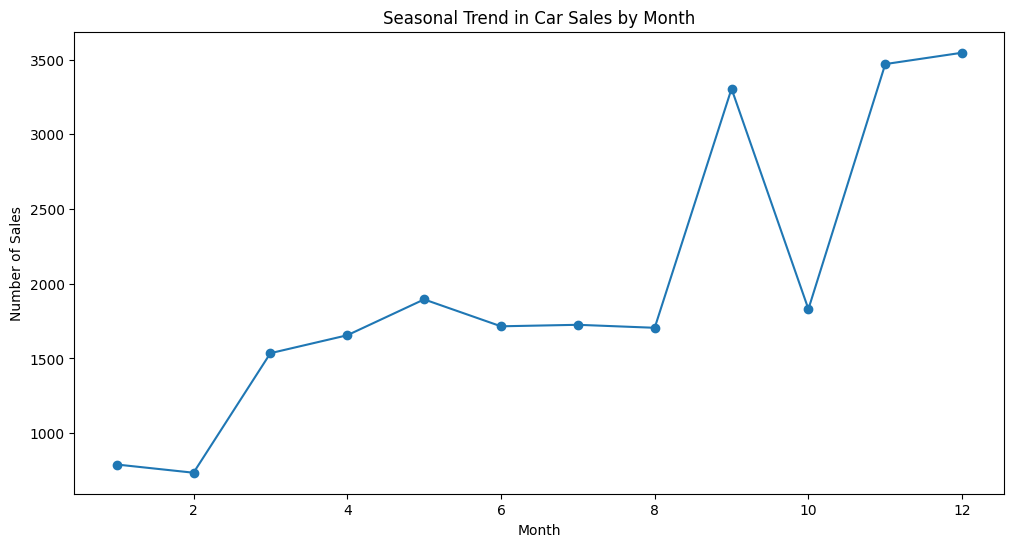

In [113]:
df1['Date'] = pd.to_datetime(df1['Date'])

df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day

monthly_sales = df1.groupby('Month')['Price ($)'].count()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind = 'line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Seasonal Trend in Car Sales by Month')
plt.show()

In [114]:
#Sales is highest in December
#A spike in number of sales is seen in Sept

Q13. How does the car price distribution change when considering different combinations of body style and
transmission type?

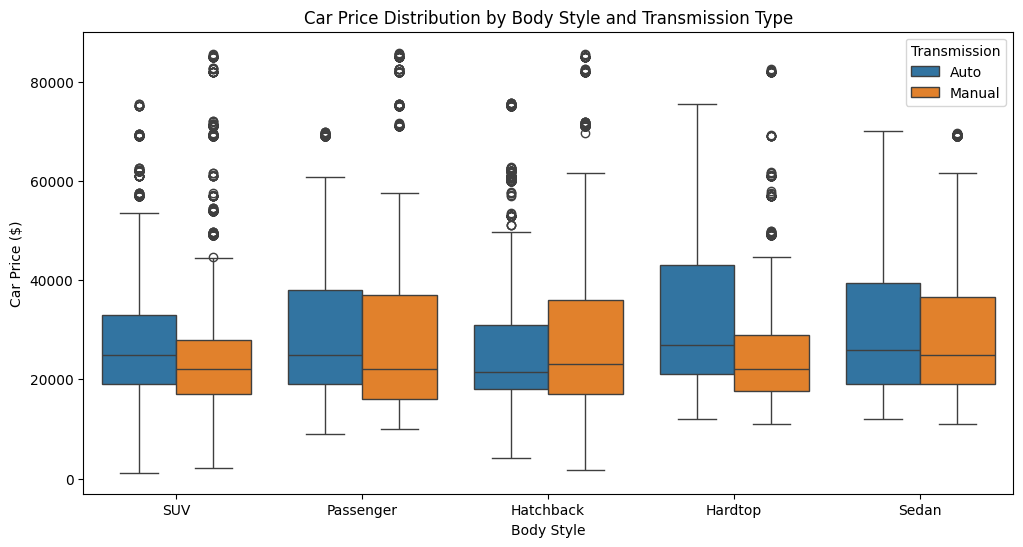

In [115]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df1)
plt.xlabel('Body Style')
plt.ylabel('Car Price ($)')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.show()

Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

In [117]:
correlation_matrix = df1[['Price ($)', 'Annual Income']].corr()
correlation_matrix

,Price ($),Annual Income
Price ($),1.000000,0.012065
Annual Income,0.012065,1.000000


Q15. How does the average car price vary across different car models and engine types?

In [121]:
avg_price_by_model_engine = df1.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
avg_price_by_model_engine

,Model,Engine,Price ($)
0,3-Sep,DoubleÂ Overhead Camshaft,37986.380117
1,3000GT,DoubleÂ Overhead Camshaft,22764.326923
2,3000GT,Overhead Camshaft,21770.659864
3,300M,DoubleÂ Overhead Camshaft,21394.888889
4,323i,DoubleÂ Overhead Camshaft,16744.632287
...,...,...,...
256,Windstar,Overhead Camshaft,17100.272727
257,Wrangler,DoubleÂ Overhead Camshaft,21145.294737
258,Wrangler,Overhead Camshaft,18742.942029
259,Xterra,DoubleÂ Overhead Camshaft,15940.459459


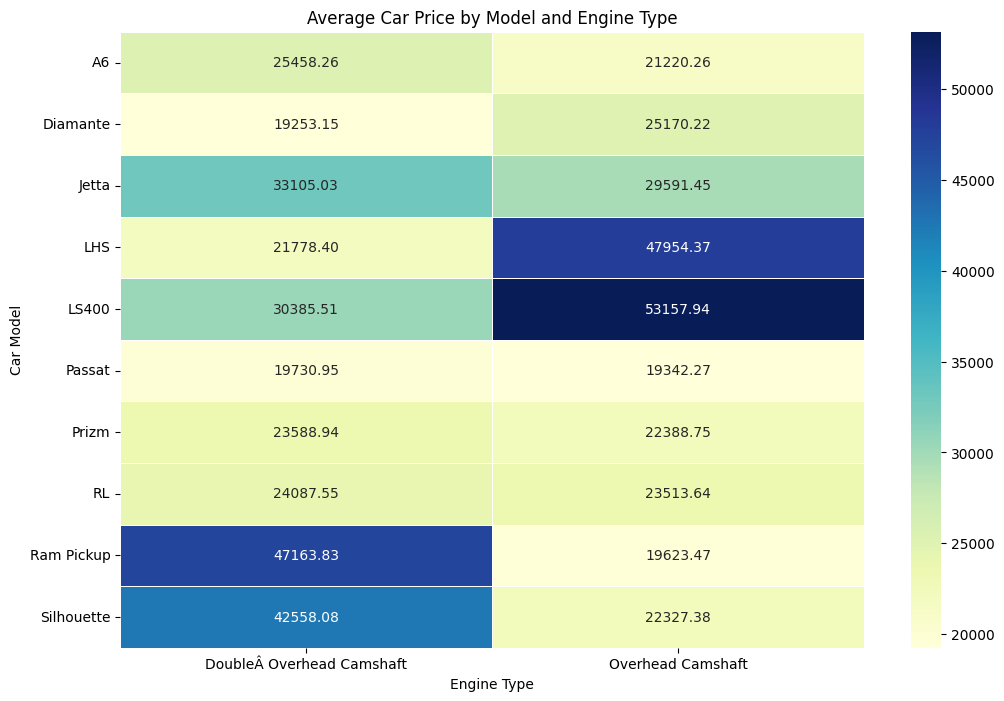

In [125]:
# Get the top 10 car models and engine types based on frequency
top_models = df1['Model'].value_counts().head(10).index
top_engines = df1['Engine'].value_counts().head(10).index

# Filter the dataset to include only the top models and engines
filtered_data = df1[df1['Model'].isin(top_models) & df1['Engine'].isin(top_engines)]

# Recalculate the average price with the filtered dataset
avg_price_by_model_engine = filtered_data.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Pivot the data for visualization
price_pivot = avg_price_by_model_engine.pivot(index='Model', columns='Engine', values='Price ($)')

# Plotting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(price_pivot, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Average Car Price by Model and Engine Type')
plt.ylabel('Car Model')
plt.xlabel('Engine Type')
plt.show()
